In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!pip install import_ipynb
import import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.2 MB/s eta 0:00:00


In [3]:
cd drive

/content/drive


In [4]:
cd MyDrive

/content/drive/MyDrive


In [5]:
cd fgsm 실습 폴더

/content/drive/MyDrive/fgsm 실습 폴더


In [6]:
# 필수적인 패키지 임포트
from pyimagesearch.simplecnn import SimpleCNN
from pyimagesearch.fgsm import generate_image_adversary
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10 # CIFAR-10로 변경
import numpy as np
import cv2

importing Jupyter notebook from /content/drive/MyDrive/fgsm 실습 폴더/pyimagesearch/simplecnn.ipynb
importing Jupyter notebook from /content/drive/MyDrive/fgsm 실습 폴더/pyimagesearch/fgsm.ipynb


In [10]:
# CIFAR-10 데이터셋을 로드하고 픽셀의 값을 [0,1]의 범위로 조정
print("[INFO] loading-10 dataset...")
(trainX,trainY),(testX,testY)=cifar10.load_data()
trainX=trainX/255.0
testX=testX/255.0

#optimizer(최적화 함수)와 모델 초기화
print("[INFO] compiling model...")
opt=Adam(lr=1e-3)
model=SimpleCNN.build(width=32,height=32,depth=3,classes=10) # CIFAR-10 이미지 크기에 맞게 변경
model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])


[INFO] loading-10 dataset...


[INFO] compiling model...


In [11]:
#간단한 CNN과 CIFAR-10를 훈련
print("[INFO] training network...")
model.fit(trainX,trainY,
          validation_data=(testX,testY),
          batch_size=64,
          epochs=10,
          verbose=1)


[INFO] training network...
Epoch 1/10
782/782 [==============================] - 39s 47ms/step - loss: 1.6072 - accuracy: 0.4516 - val_loss: 1.2903 - val_accuracy: 0.5465
Epoch 2/10
782/782 [==============================] - 38s 49ms/step - loss: 1.1709 - accuracy: 0.5848 - val_loss: 1.0496 - val_accuracy: 0.6229
Epoch 3/10
782/782 [==============================] - 35s 44ms/step - loss: 1.0314 - accuracy: 0.6379 - val_loss: 1.0274 - val_accuracy: 0.6350
Epoch 4/10
782/782 [==============================] - 42s 54ms/step - loss: 0.9298 - accuracy: 0.6716 - val_loss: 1.0068 - val_accuracy: 0.6439
Epoch 5/10
782/782 [==============================] - 38s 49ms/step - loss: 0.8514 - accuracy: 0.6972 - val_loss: 1.0067 - val_accuracy: 0.6448
Epoch 6/10
782/782 [==============================] - 35s 45ms/step - loss: 0.7833 - accuracy: 0.7206 - val_loss: 0.9603 - val_accuracy: 0.6635
Epoch 7/10
782/782 [==============================] - 38s 48ms/step - loss: 0.7191 - accuracy: 0.7469 - val_l

In [12]:
#훈련된 모델에 대한 테스트 세트의 예측 수행
(loss,acc)=model.evaluate(x=testX,y=testY,verbose=0)
print("[INFO] loss: {:.4f}, acc: {:.4f}".format(loss, acc))

[INFO] loss: 0.9954, acc: 0.6732


1/1 [==============================] - 0s 24ms/step


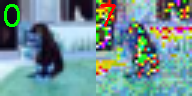

1/1 [==============================] - 0s 27ms/step


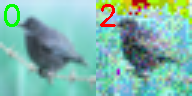

1/1 [==============================] - 0s 21ms/step


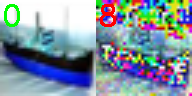

1/1 [==============================] - 0s 21ms/step


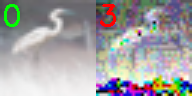

1/1 [==============================] - 0s 21ms/step


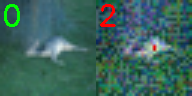

1/1 [==============================] - 0s 21ms/step


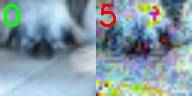

1/1 [==============================] - 0s 22ms/step


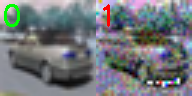

1/1 [==============================] - 0s 35ms/step


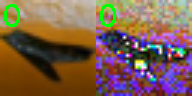

1/1 [==============================] - 0s 22ms/step


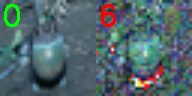

1/1 [==============================] - 0s 23ms/step


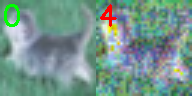

In [20]:
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import cv2
#테스트 이미지들 샘플링 반복
for _ in range(10):
  # 테스트 이미지들 중에서 무작위로 샘플링
  i=np.random.choice(np.arange(0,len(testX)))

  #현재 이미지와 라벨을 가져오기
  image=testX[i]
  label=testY[i]

  #현재 이미지에 대한 적대적 이미지를 생성하고 적대적 예측
  adversary=generate_image_adversary(model, image.reshape(1,32,32,3),label,eps=0.1)
  pred = model.predict(adversary)

  # 원본 이미지와 적대적 이미지를 원하는 범위로 크기 조정 [0, 255]와 8비트 정수로 변환
  adversary = (adversary.reshape((32, 32, 3)) * 255).astype("uint8")
  image = (image * 255).astype("uint8")

  # 이미지의 크기를 조정해서 더 잘 볼 수 있게 함
  image = cv2.resize(image, (96, 96))
  adversary = cv2.resize(adversary, (96, 96))

  #원본 이미지와 적대적 이미지에 대한 예측 레이블을 결정합니다
  image_Pred=label.argmax()
  adversaryPred=pred[0].argmax()
  color=(0,255,0)

  # 만약 이미지 예측이 적대적 예측과 같지않다면 예측 후에 색을 바꾼다.
  if image_Pred!=adversaryPred:
    color=(0,0,255)

  # 각각 출력 이미지의 예측을 그린다.
  cv2.putText(image, str(image_Pred), (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)

  cv2.putText(adversary, str(adversaryPred), (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)

  # 원본 이미지와 적대적 이미지를 옆으로 이어서 하나의 이미지로 표시
  output = np.hstack([image, adversary])
  cv2_imshow( output)
  cv2.waitKey(0)

MNIST 데이터셋 - 28 28 크기의 흑백 이미지
CIFAR-10 데이터셋 - 10가지 클래스에 속하는 작은 자연 이미지로 구성된 데이터셋. 각 이미지는 32 32 크기이며 ,RGB 컬러 이미지임.

1/1 [==============================] - 0s 29ms/step


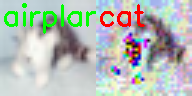

1/1 [==============================] - 0s 46ms/step


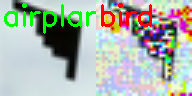

1/1 [==============================] - 0s 32ms/step


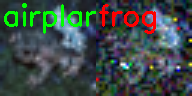

1/1 [==============================] - 0s 32ms/step


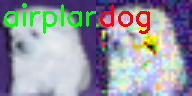

1/1 [==============================] - 0s 38ms/step


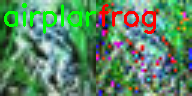

1/1 [==============================] - 0s 34ms/step


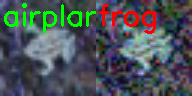

1/1 [==============================] - 0s 32ms/step


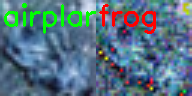

1/1 [==============================] - 0s 29ms/step


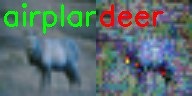

1/1 [==============================] - 0s 45ms/step


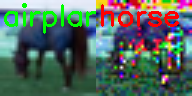

1/1 [==============================] - 0s 29ms/step


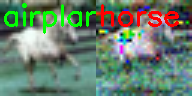

In [22]:
image_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import cv2
#테스트 이미지들 샘플링 반복
for _ in range(10):
  # 테스트 이미지들 중에서 무작위로 샘플링
  i=np.random.choice(np.arange(0,len(testX)))

  #현재 이미지와 라벨을 가져오기
  image=testX[i]
  label=testY[i]

  #현재 이미지에 대한 적대적 이미지를 생성하고 적대적 예측
  adversary=generate_image_adversary(model, image.reshape(1,32,32,3),label,eps=0.1)
  pred = model.predict(adversary)

  # 원본 이미지와 적대적 이미지를 원하는 범위로 크기 조정 [0, 255]와 8비트 정수로 변환
  adversary = (adversary.reshape((32, 32, 3)) * 255).astype("uint8")
  image = (image * 255).astype("uint8")

  # 이미지의 크기를 조정해서 더 잘 볼 수 있게 함
  image = cv2.resize(image, (96, 96))
  adversary = cv2.resize(adversary, (96, 96))

  #원본 이미지와 적대적 이미지에 대한 예측 레이블을 결정합니다
  image_Pred=label.argmax()
  adversaryPred=pred[0].argmax()
  color=(0,255,0)

  # 만약 이미지 예측이 적대적 예측과 같지않다면 예측 후에 색을 바꾼다.
  if image_Pred!=adversaryPred:
    color=(0,0,255)


  # 각각 출력 이미지의 예측을 그린다.
  cv2.putText(image, image_label[image_Pred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)

  cv2.putText(adversary, image_label[adversaryPred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)

  # 원본 이미지와 적대적 이미지를 옆으로 이어서 하나의 이미지로 표시
  output = np.hstack([image, adversary])
  cv2_imshow( output)
  cv2.waitKey(0)

1/1 [==============================] - 0s 29ms/step
dog
cat


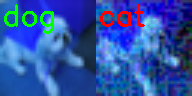

1/1 [==============================] - 0s 29ms/step
ship
airplane


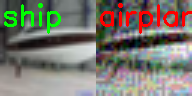

1/1 [==============================] - 0s 31ms/step
automobile
truck


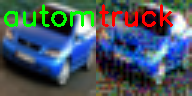

1/1 [==============================] - 0s 32ms/step
airplane
ship


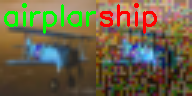

1/1 [==============================] - 0s 29ms/step
horse
dog


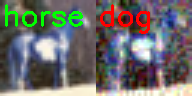

1/1 [==============================] - 0s 35ms/step
cat
automobile


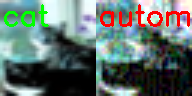

1/1 [==============================] - 0s 31ms/step
airplane
ship


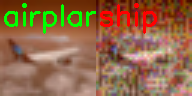

1/1 [==============================] - 0s 37ms/step
bird
horse


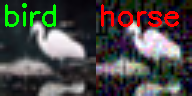

1/1 [==============================] - 0s 33ms/step
bird
horse


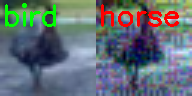

1/1 [==============================] - 0s 31ms/step
horse
dog


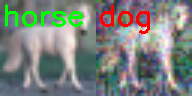

In [26]:
image_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import cv2
#테스트 이미지들 샘플링 반복
for _ in range(10):
  # 테스트 이미지들 중에서 무작위로 샘플링
  i=np.random.choice(np.arange(0,len(testX)))

  #현재 이미지와 라벨을 가져오기
  image=testX[i]
  label=testY[i]

  #현재 이미지에 대한 적대적 이미지를 생성하고 적대적 예측
  adversary=generate_image_adversary(model, image.reshape(1,32,32,3),label,eps=0.1)
  pred = model.predict(adversary)

  # 원본 이미지와 적대적 이미지를 원하는 범위로 크기 조정 [0, 255]와 8비트 정수로 변환
  adversary = adversary.reshape((32, 32,3)) * 255
  adversary = np.clip(adversary, 0, 255).astype("uint8")
  image = image.reshape((32, 32, 3)) * 255
  image = image.astype("uint8")

  # 이미지의 크기를 조정해서 더 잘 볼 수 있게 함
  image = cv2.resize(image, (96, 96))
  adversary = cv2.resize(adversary, (96, 96))

  #원본 이미지와 적대적 이미지에 대한 예측 레이블을 결정합니다
  image_Pred=label.argmax()
  adversaryPred=pred[0].argmax()
  color=(0,255,0)

  # 만약 이미지 예측이 적대적 예측과 같지않다면 예측 후에 색을 바꾼다.
  if image_Pred!=adversaryPred:
    color=(0,0,255)


  # 각각 출력 이미지의 예측을 그린다.
  cv2.putText(image, image_label[image_Pred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)
  print(image_label[image_Pred])

  cv2.putText(adversary, image_label[adversaryPred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)
  print(image_label[adversaryPred])

  # 원본 이미지와 적대적 이미지를 옆으로 이어서 하나의 이미지로 표시
  output = np.hstack([image, adversary])
  cv2_imshow( output)
  cv2.waitKey(0)

1/1 [==============================] - 0s 34ms/step


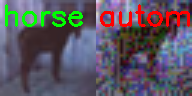

1/1 [==============================] - 0s 22ms/step


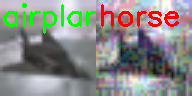

1/1 [==============================] - 0s 21ms/step


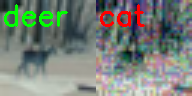

1/1 [==============================] - 0s 21ms/step


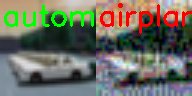

1/1 [==============================] - 0s 22ms/step


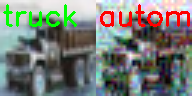

1/1 [==============================] - 0s 20ms/step


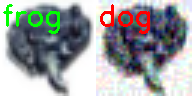

1/1 [==============================] - 0s 20ms/step


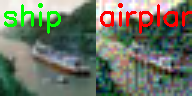

1/1 [==============================] - 0s 21ms/step


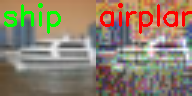

1/1 [==============================] - 0s 21ms/step


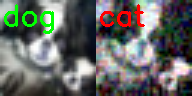

1/1 [==============================] - 0s 21ms/step


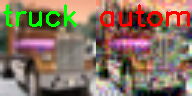

In [27]:
image_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import cv2
#테스트 이미지들 샘플링 반복
for _ in range(10):
  # 테스트 이미지들 중에서 무작위로 샘플링
  i=np.random.choice(np.arange(0,len(testX)))

  #현재 이미지와 라벨을 가져오기
  image=testX[i]
  label=testY[i]

  #현재 이미지에 대한 적대적 이미지를 생성하고 적대적 예측
  adversary=generate_image_adversary(model, image.reshape(1,32,32,3),label,eps=0.1)
  pred = model.predict(adversary)

  # 원본 이미지와 적대적 이미지를 원하는 범위로 크기 조정 [0, 255]와 8비트 정수로 변환
  adversary = adversary.reshape((32, 32,3)) * 255
  adversary = np.clip(adversary, 0, 255).astype("uint8")
  image = image.reshape((32, 32, 3)) * 255
  image = image.astype("uint8")

  # 이미지의 크기를 조정해서 더 잘 볼 수 있게 함
  image = cv2.resize(image, (96, 96))
  adversary = cv2.resize(adversary, (96, 96))

  #원본 이미지와 적대적 이미지에 대한 예측 레이블을 결정합니다
  image_Pred=label.argmax()
  adversaryPred=pred[0].argmax()
  color=(0,255,0)

  # 만약 이미지 예측이 적대적 예측과 같지않다면 예측 후에 색을 바꾼다.
  if image_Pred!=adversaryPred:
    color=(0,0,255)


  # 각각 출력 이미지의 예측을 그린다.
  cv2.putText(image, image_label[image_Pred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)

  cv2.putText(adversary, image_label[adversaryPred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)

  # 원본 이미지와 적대적 이미지를 옆으로 이어서 하나의 이미지로 표시
  output = np.hstack([image, adversary])
  cv2_imshow( output)
  cv2.waitKey(0)

1/1 [==============================] - 0s 20ms/step


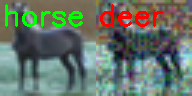

1/1 [==============================] - 0s 21ms/step


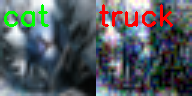

1/1 [==============================] - 0s 23ms/step


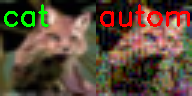

1/1 [==============================] - 0s 21ms/step


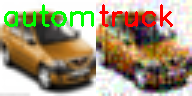

1/1 [==============================] - 0s 20ms/step


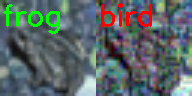

1/1 [==============================] - 0s 20ms/step


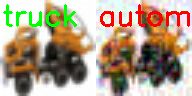

1/1 [==============================] - 0s 19ms/step


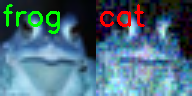

1/1 [==============================] - 0s 20ms/step


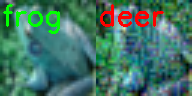

1/1 [==============================] - 0s 21ms/step


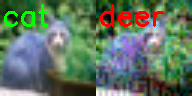

1/1 [==============================] - 0s 21ms/step


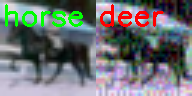

In [29]:
image_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import cv2
#테스트 이미지들 샘플링 반복
for _ in range(10):
  # 테스트 이미지들 중에서 무작위로 샘플링
  i=np.random.choice(np.arange(0,len(testX)))

  #현재 이미지와 라벨을 가져오기
  image=testX[i]
  label=testY[i]

  #현재 이미지에 대한 적대적 이미지를 생성하고 적대적 예측
  adversary=generate_image_adversary(model, image.reshape(1,32,32,3),label,eps=0.1)
  pred = model.predict(adversary)

  # 원본 이미지와 적대적 이미지를 원하는 범위로 크기 조정 [0, 255]와 8비트 정수로 변환
  adversary = adversary.reshape((32, 32,3)) * 255
  adversary = np.clip(adversary, 0, 255).astype("uint8")
  image = image.reshape((32, 32, 3)) * 255
  image = image.astype("uint8")

  # 이미지의 크기를 조정해서 더 잘 볼 수 있게 함
  image = cv2.resize(image, (96, 96))
  adversary = cv2.resize(adversary, (96, 96))
  #원본 이미지와 적대적 이미지에 대한 예측 레이블을 결정합니다
  image_Pred=label.argmax()
  adversaryPred=pred[0].argmax()
  color=(0,255,0)

  # 만약 이미지 예측이 적대적 예측과 같지않다면 예측 후에 색을 바꾼다.
  if image_Pred!=adversaryPred:
    color=(0,0,255)


  # 각각 출력 이미지의 예측을 그린다.
  cv2.putText(image, image_label[image_Pred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)

  cv2.putText(adversary, image_label[adversaryPred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)

  # 원본 이미지와 적대적 이미지를 옆으로 이어서 하나의 이미지로 표시
  output = np.hstack([image, adversary])
  cv2_imshow( output)
  cv2.waitKey(0)

1/1 [==============================] - 0s 34ms/step


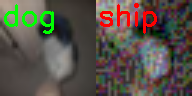

1/1 [==============================] - 0s 32ms/step


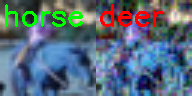

1/1 [==============================] - 0s 36ms/step


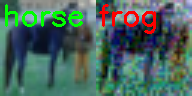

1/1 [==============================] - 0s 36ms/step


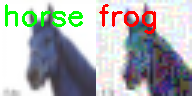

1/1 [==============================] - 0s 30ms/step


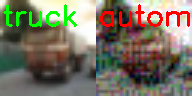

1/1 [==============================] - 0s 29ms/step


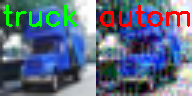

1/1 [==============================] - 0s 35ms/step


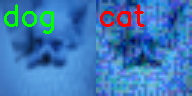

1/1 [==============================] - 0s 37ms/step


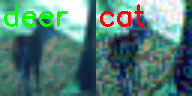

1/1 [==============================] - 0s 31ms/step


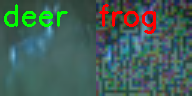

1/1 [==============================] - 0s 36ms/step


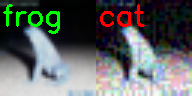

In [33]:
image_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import cv2
#테스트 이미지들 샘플링 반복
for _ in range(10):
  # 테스트 이미지들 중에서 무작위로 샘플링
  i=np.random.choice(np.arange(0,len(testX)))

  #현재 이미지와 라벨을 가져오기
  image=testX[i]
  label=testY[i]

  #현재 이미지에 대한 적대적 이미지를 생성하고 적대적 예측
  adversary=generate_image_adversary(model, image.reshape(1,32,32,3),label,eps=0.1)
  pred = model.predict(adversary)

  # 원본 이미지와 적대적 이미지를 원하는 범위로 크기 조정 [0, 255]와 8비트 정수로 변환, 이 부분을 제대로 해줘야 오류가 안남
  #adversary = (adversary.reshape((32, 32, 3)) * 255).astype("uint8")
  #image = (image * 255).astype("uint8")
  adversary = adversary.reshape((32, 32,3)) * 255
  adversary = np.clip(adversary, 0, 255).astype("uint8")
  image = image.reshape((32, 32, 3)) * 255
  image = image.astype("uint8")

  # 이미지의 크기를 조정해서 더 잘 볼 수 있게 함
  image = cv2.resize(image, (96, 96))
  adversary = cv2.resize(adversary, (96, 96))

  #원본 이미지와 적대적 이미지에 대한 예측 레이블을 결정합니다
  image_Pred=label.argmax()
  adversaryPred=pred[0].argmax()
  color=(0,255,0)

  # 만약 이미지 예측이 적대적 예측과 같지않다면 예측 후에 색을 바꾼다.
  if image_Pred!=adversaryPred:
    color=(0,0,255)


  # 각각 출력 이미지의 예측을 그린다.
  cv2.putText(image, image_label[image_Pred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)

  cv2.putText(adversary, image_label[adversaryPred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)

  # 원본 이미지와 적대적 이미지를 옆으로 이어서 하나의 이미지로 표시
  output = np.hstack([image, adversary])
  cv2_imshow( output)
  cv2.waitKey(0)

1/1 [==============================] - 0s 82ms/step


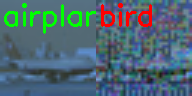

1/1 [==============================] - 0s 109ms/step


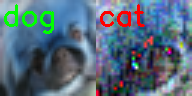

1/1 [==============================] - 0s 114ms/step


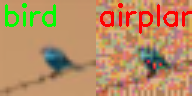

1/1 [==============================] - 0s 57ms/step


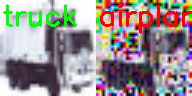

1/1 [==============================] - 0s 148ms/step


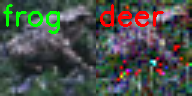

1/1 [==============================] - 0s 130ms/step


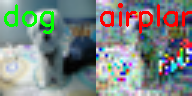

1/1 [==============================] - 0s 127ms/step


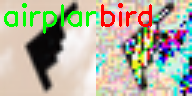

1/1 [==============================] - 0s 50ms/step


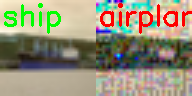

1/1 [==============================] - 0s 34ms/step


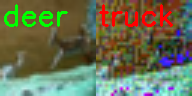

1/1 [==============================] - 0s 31ms/step


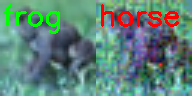

In [37]:
for i in np.random.choice(np.arange(0, len(testX)), size=(10,)):
    # grab the current image and label
    image = testX[i]
    label = testY[i]

    # generate an image adversary for the current image and make
    # a prediction on the adversary
    adversary = generate_image_adversary(model,
                                         image.reshape(1, 32, 32, 3), label, eps=0.1)

    pred = model.predict(adversary)

    # convert the image and adversarial image from grayscale to three
    # channel (so we can draw on them)
    image = (image.reshape((32, 32, 3)) * 255).astype("uint8")
    adversary = (adversary.reshape((32, 32, 3)) * 255).astype("uint8")

    # resize the images so we can better visualize them
    image = cv2.resize(image, (96, 96))
    adversary = cv2.resize(adversary, (96, 96))

    # determine the predicted label for both the original image and
    # adversarial image
    imagePred = np.argmax(label)
    adversaryPred = np.argmax(pred)

    color = (0, 255, 0)
    if imagePred != adversaryPred:
        color = (0, 0, 255)

    # draw the predictions on the respective output images
    cv2.putText(image, image_label[imagePred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)
    cv2.putText(adversary, image_label[adversaryPred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)
    # stack the two images horizontally and then show the original
    # image and adversarial image
    output = np.hstack([image, adversary])
    cv2_imshow( output)
    cv2.waitKey(0)

1/1 [==============================] - 0s 22ms/step


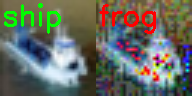

1/1 [==============================] - 0s 21ms/step


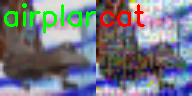

1/1 [==============================] - 0s 21ms/step


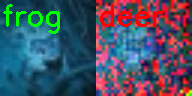

1/1 [==============================] - 0s 24ms/step


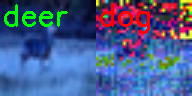

1/1 [==============================] - 0s 21ms/step


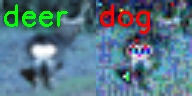

1/1 [==============================] - 0s 20ms/step


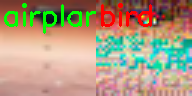

1/1 [==============================] - 0s 20ms/step


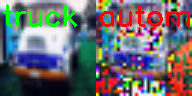

1/1 [==============================] - 0s 24ms/step


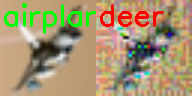

1/1 [==============================] - 0s 20ms/step


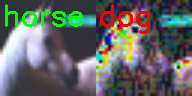

1/1 [==============================] - 0s 20ms/step


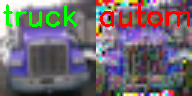

In [41]:
image_label=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
from google.colab.patches import cv2_imshow
from google.colab.patches import cv2_imshow
import cv2
#테스트 이미지들 샘플링 반복
for _ in range(10):
  # 테스트 이미지들 중에서 무작위로 샘플링
  i=np.random.choice(np.arange(0,len(testX)))

  #현재 이미지와 라벨을 가져오기
  image=testX[i]
  label=testY[i]

  #현재 이미지에 대한 적대적 이미지를 생성하고 적대적 예측
  adversary=generate_image_adversary(model, image.reshape(1,32,32,3),label,eps=0.1)
  pred = model.predict(adversary)

  # 원본 이미지와 적대적 이미지를 원하는 범위로 크기 조정 [0, 255]와 8비트 정수로 변환, 이 부분을 제대로 해줘야 오류가 안남
  adversary = (adversary.reshape((32, 32, 3)) * 255).astype("uint8")
  image = (image.reshape(32,32,3) * 255).astype("uint8")

  #adversary = adversary.reshape((32, 32,3)) * 255
  #adversary = np.clip(adversary, 0, 255).astype("uint8")
  #image = image.reshape((32, 32, 3)) * 255
  #image = image.astype("uint8")


  # 이미지의 크기를 조정해서 더 잘 볼 수 있게 함
  image = cv2.resize(image, (96, 96))
  adversary = cv2.resize(adversary, (96, 96))

  #원본 이미지와 적대적 이미지에 대한 예측 레이블을 결정합니다
  image_Pred=label.argmax()
  adversaryPred=pred[0].argmax()
  color=(0,255,0)

  # 만약 이미지 예측이 적대적 예측과 같지않다면 예측 후에 색을 바꾼다.
  if image_Pred!=adversaryPred:
    color=(0,0,255)


  # 각각 출력 이미지의 예측을 그린다.
  cv2.putText(image, image_label[image_Pred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, (0, 255, 0), 2)

  cv2.putText(adversary, image_label[adversaryPred], (2, 25),
                cv2.FONT_HERSHEY_SIMPLEX, 0.95, color, 2)

  # 원본 이미지와 적대적 이미지를 옆으로 이어서 하나의 이미지로 표시
  output = np.hstack([image, adversary])
  cv2_imshow( output)
  cv2.waitKey(0)